<a href="https://colab.research.google.com/github/NSmonish/CSS_Flexbox/blob/main/CN_DTMS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dtf.csv to dtf.csv


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv("dtf.csv")

In [ ]:
df = pd.DataFrame(data)
df

,Age,Address,fav_soc,soc_act,fav_ac,com_pat,panic,sleep_pat,appetite,act_pat,tired,class
0,30-50,Yes,Facebook,Normal,Reading News,Normal,No,Normal,Normal,Disturbed,No,1
1,18-29,Yes,Facebook,Disturbed,Reading News,Normal,No,Disturbed,Normal,Disturbed,No,1
2,30-50,Yes,WhatsApp,Normal,Commenting,Normal,No,Normal,Normal,Normal,No,0
3,18-29,Yes,Facebook,Disturbed,Reading News,Normal,Yes,Disturbed,Disturbed,Disturbed,Yes,1
4,30-50,Yes,Facebook,Normal,Reading News,Normal,No,Disturbed,Normal,Normal,No,0
5,18-29,Yes,Instragram,Disturbed,Reading News,Disturbed,No,Disturbed,Disturbed,Disturbed,Yes,1
6,18-29,Yes,Facebook,Normal,Reading News,Disturbed,Yes,Disturbed,Disturbed,Disturbed,Yes,1
7,30-50,Yes,Facebook,Disturbed,Posting,Normal,Yes,Normal,Normal,Normal,No,1
8,30-50,Yes,Facebook,Disturbed,Searching for profile,Disturbed,No,Normal,Normal,Disturbed,No,1
9,18-29,Khulna,Facebook,Disturbed,Reading News,Disturbed,Yes,Disturbed,Disturbed,Disturbed,Yes,1


In [ ]:
#Data Processing

df = df.rename(columns={'class': 'outcome'})
df['Address'] = df['Address'].replace(['Khulna'], 'Yes')
df

# Convert age range to average age as int
def calculate_average_age(age_range):
  """Calculates the average age from an age range string."""
  try:
    if '-' in age_range:
      start, end = map(int, age_range.split('-'))
      return int((start + end) / 2)
    else:
      return int(age_range)
  except:
    return None

df['Age'] = df['Age'].apply(calculate_average_age)
df

,Age,Address,fav_soc,soc_act,fav_ac,com_pat,panic,sleep_pat,appetite,act_pat,tired,outcome
0,40,Yes,Facebook,Normal,Reading News,Normal,No,Normal,Normal,Disturbed,No,1
1,23,Yes,Facebook,Disturbed,Reading News,Normal,No,Disturbed,Normal,Disturbed,No,1
2,40,Yes,WhatsApp,Normal,Commenting,Normal,No,Normal,Normal,Normal,No,0
3,23,Yes,Facebook,Disturbed,Reading News,Normal,Yes,Disturbed,Disturbed,Disturbed,Yes,1
4,40,Yes,Facebook,Normal,Reading News,Normal,No,Disturbed,Normal,Normal,No,0
5,23,Yes,Instragram,Disturbed,Reading News,Disturbed,No,Disturbed,Disturbed,Disturbed,Yes,1
6,23,Yes,Facebook,Normal,Reading News,Disturbed,Yes,Disturbed,Disturbed,Disturbed,Yes,1
7,40,Yes,Facebook,Disturbed,Posting,Normal,Yes,Normal,Normal,Normal,No,1
8,40,Yes,Facebook,Disturbed,Searching for profile,Disturbed,No,Normal,Normal,Disturbed,No,1
9,23,Yes,Facebook,Disturbed,Reading News,Disturbed,Yes,Disturbed,Disturbed,Disturbed,Yes,1


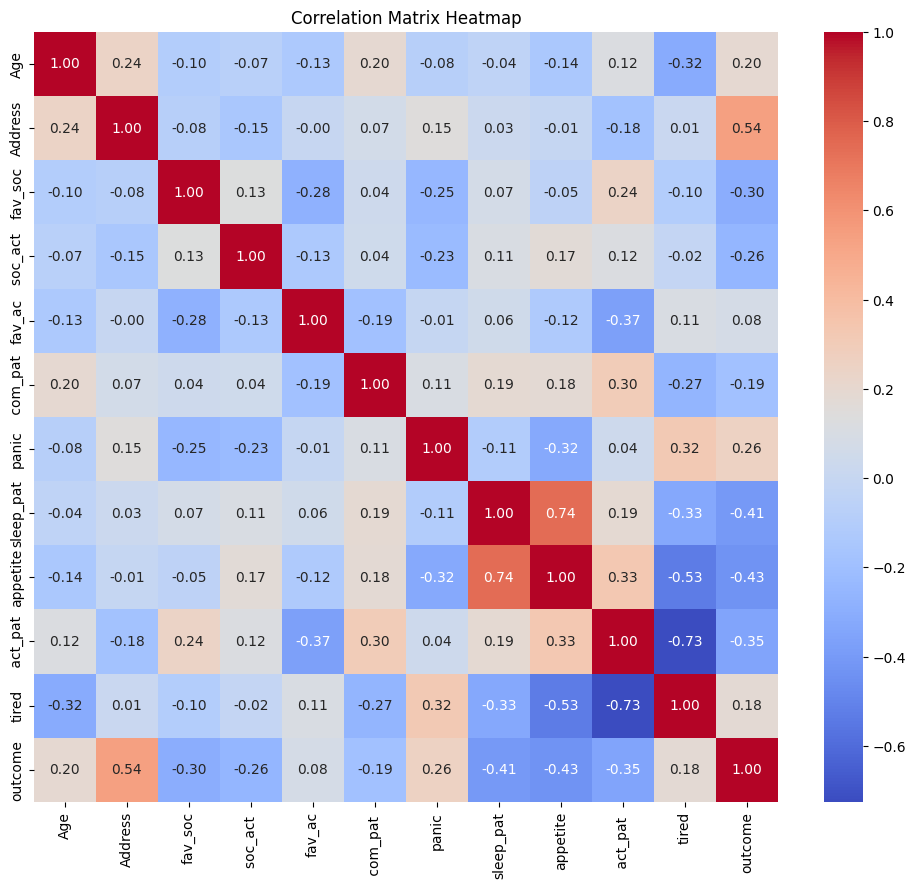

In [ ]:
# Correlation matrix
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


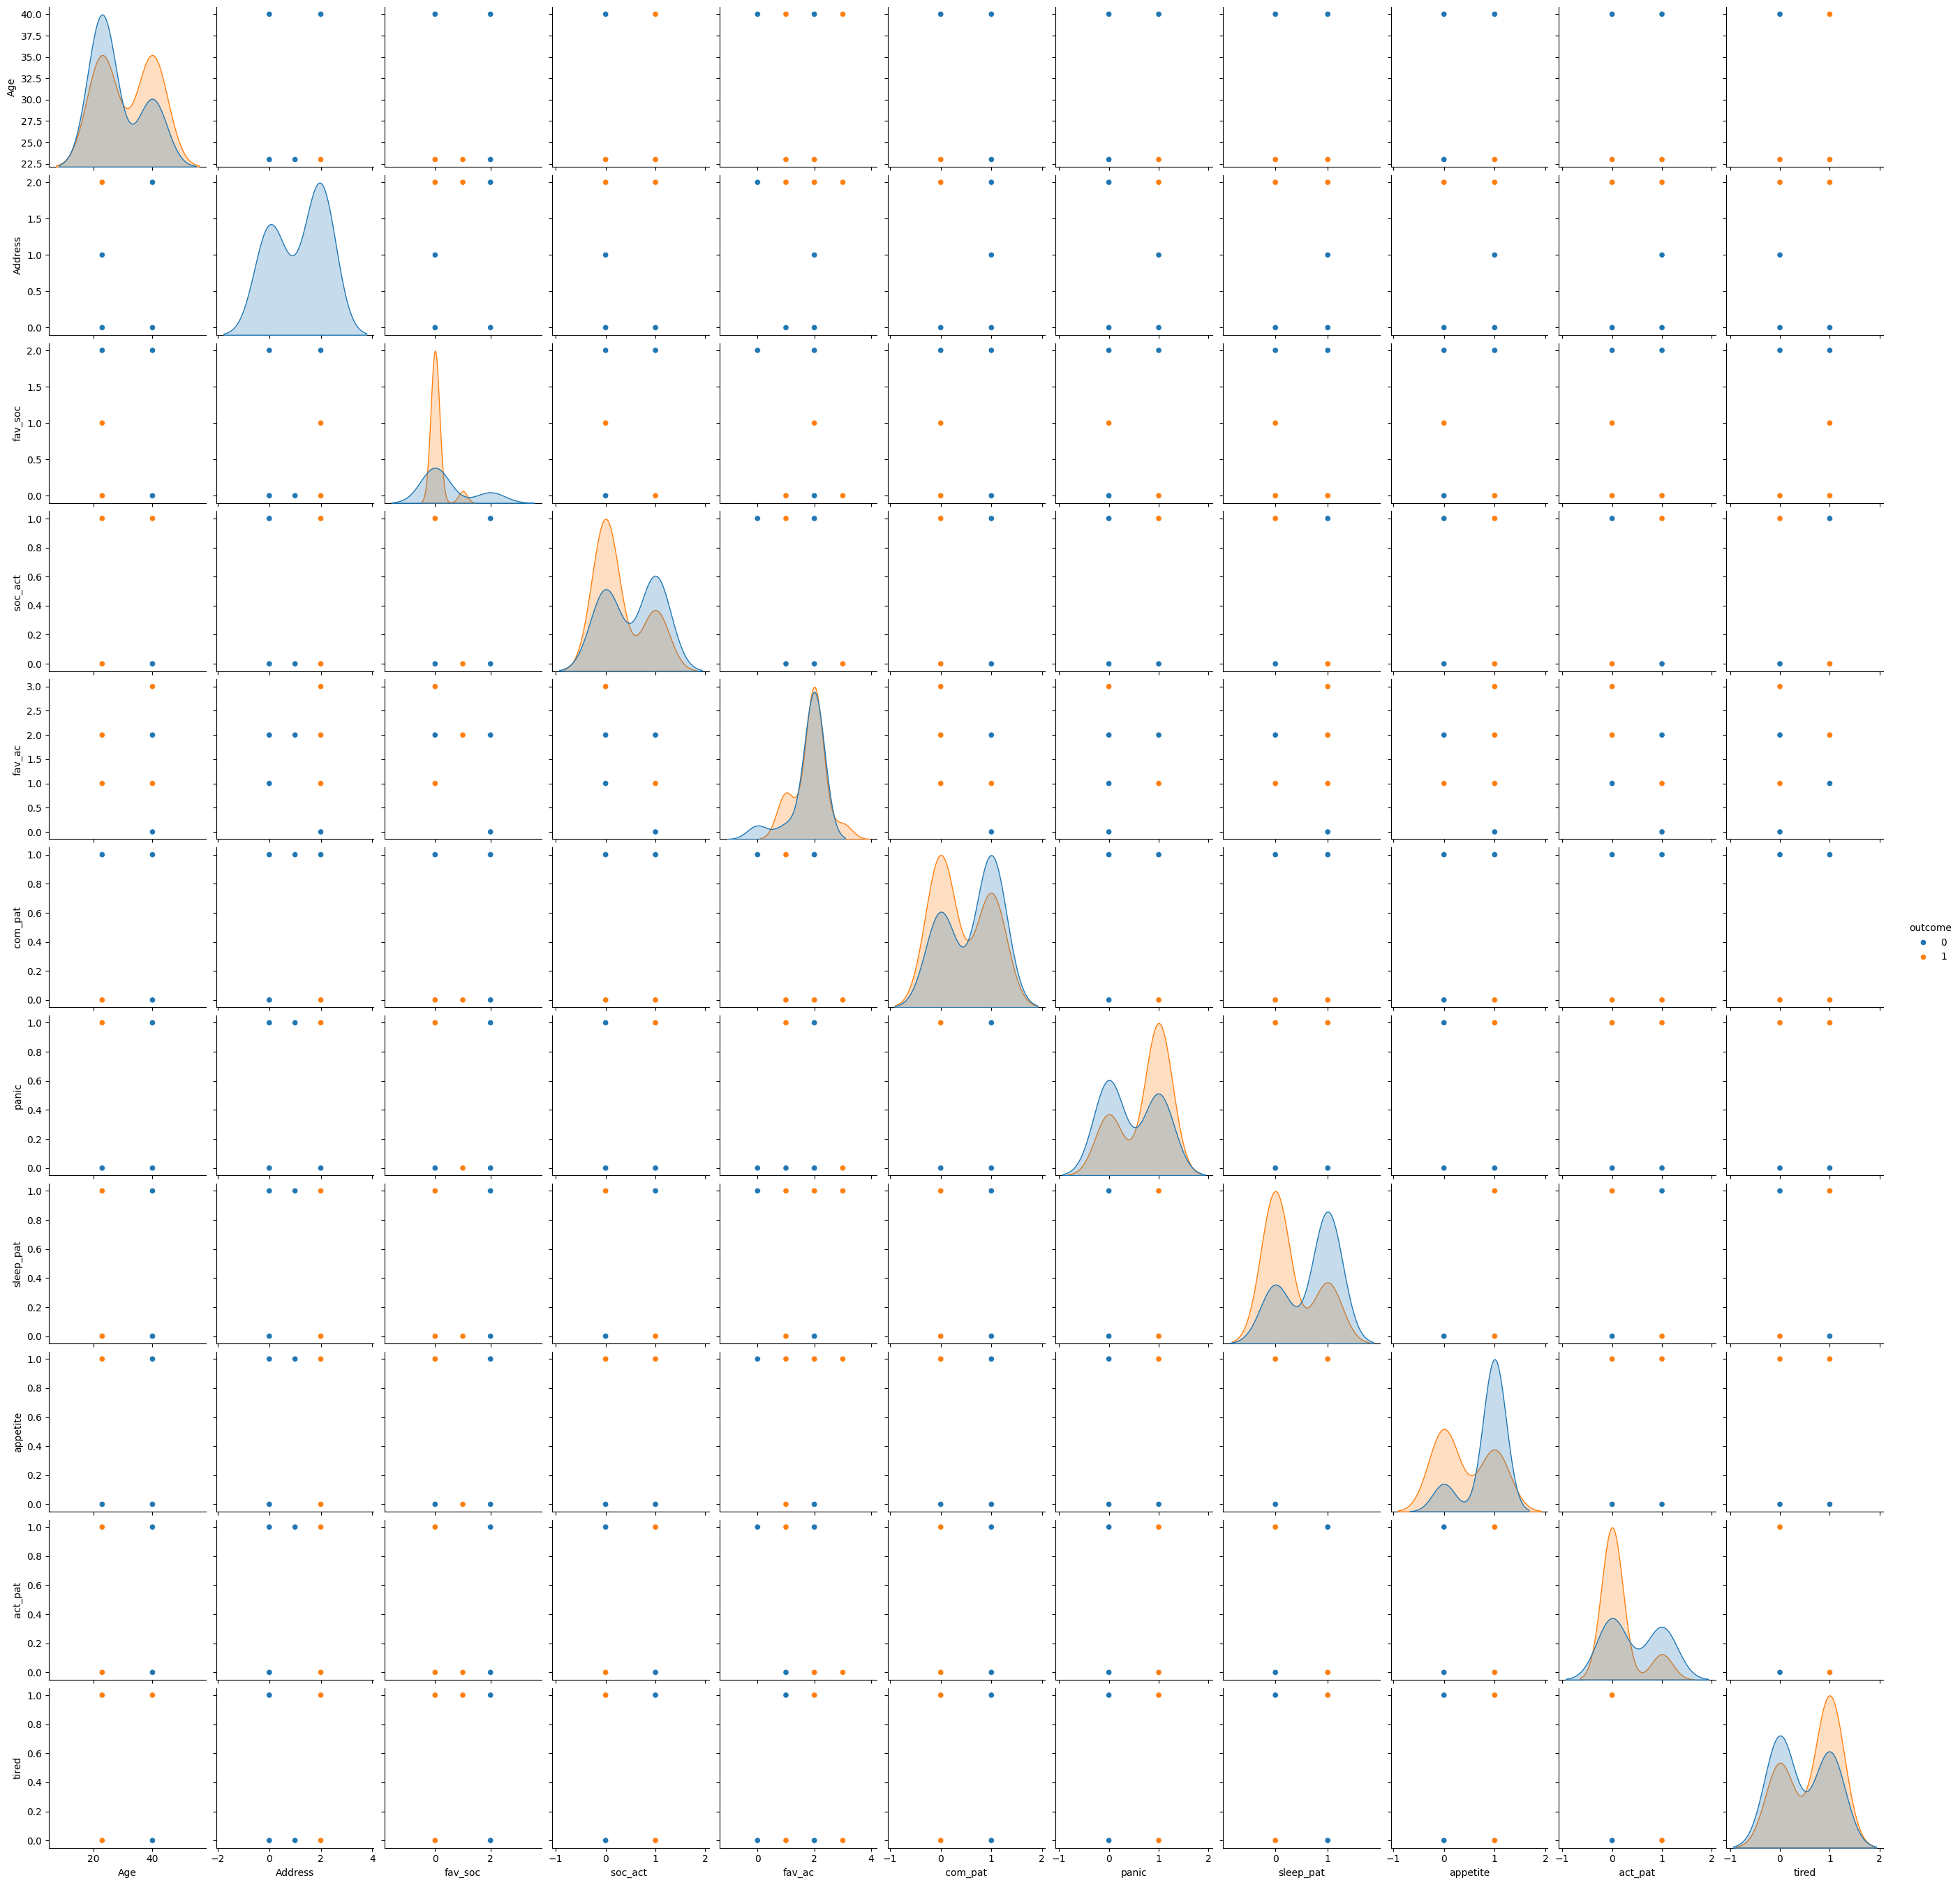

In [ ]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='outcome')
plt.show()

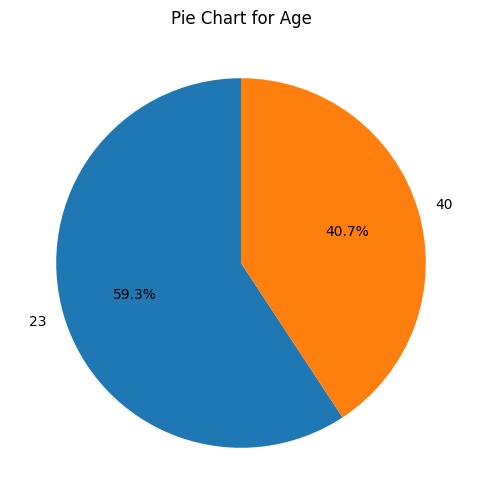

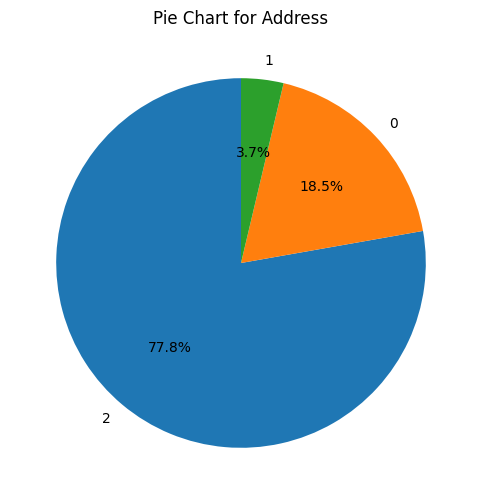

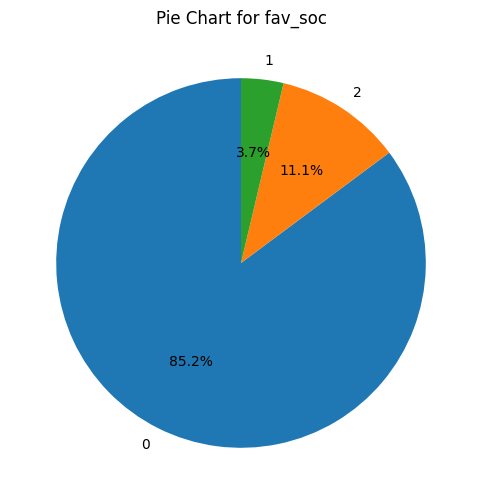

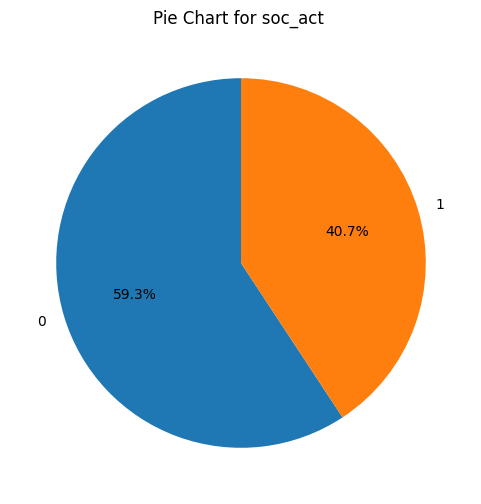

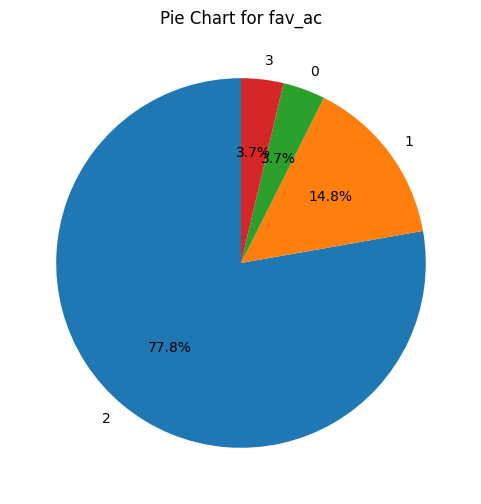

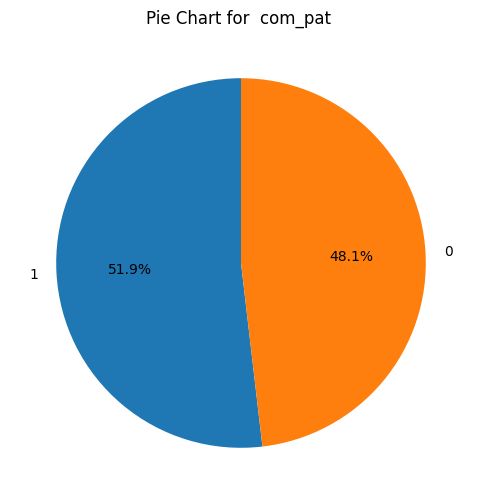

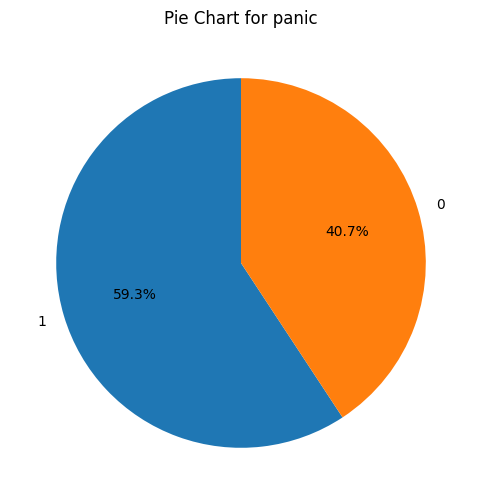

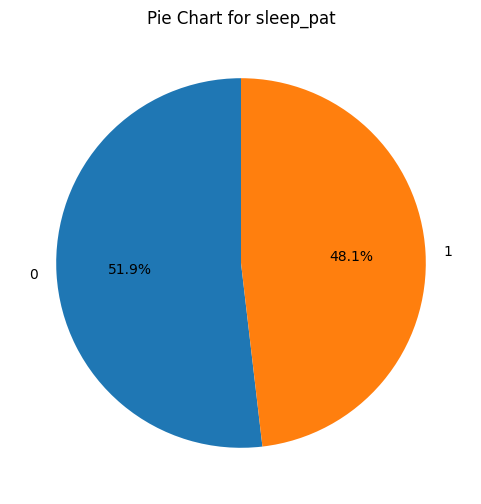

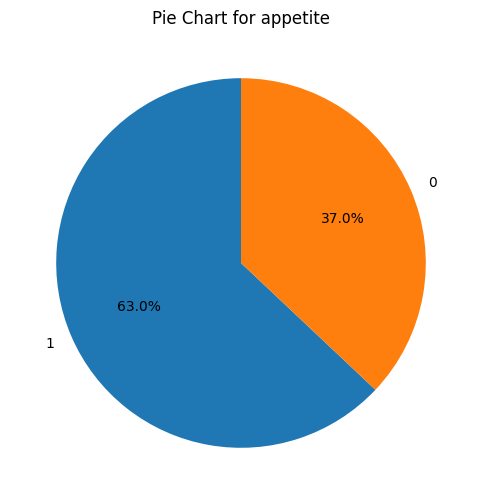

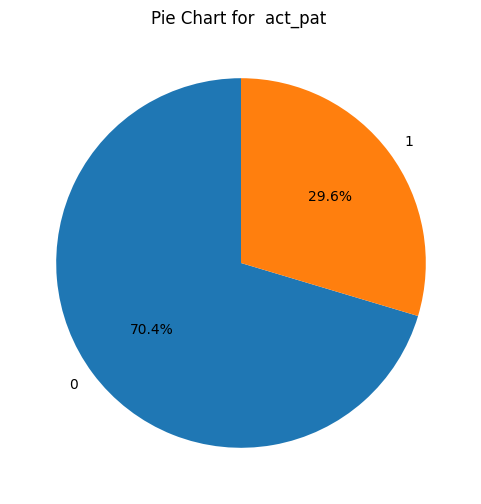

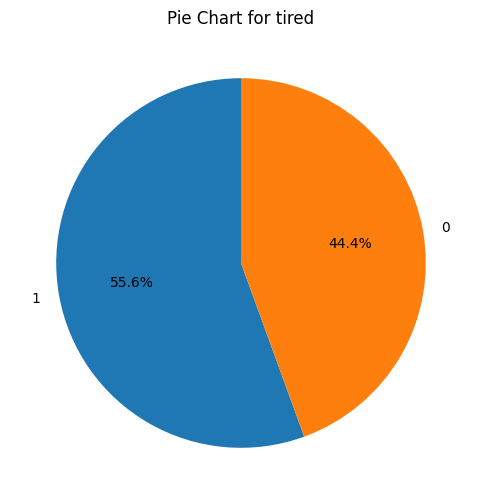

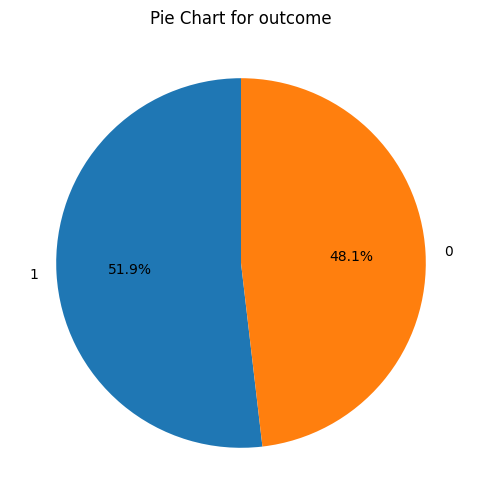

In [ ]:
# Pie charts
for column in df.columns:
  if df[column].dtype in [int, float]:
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



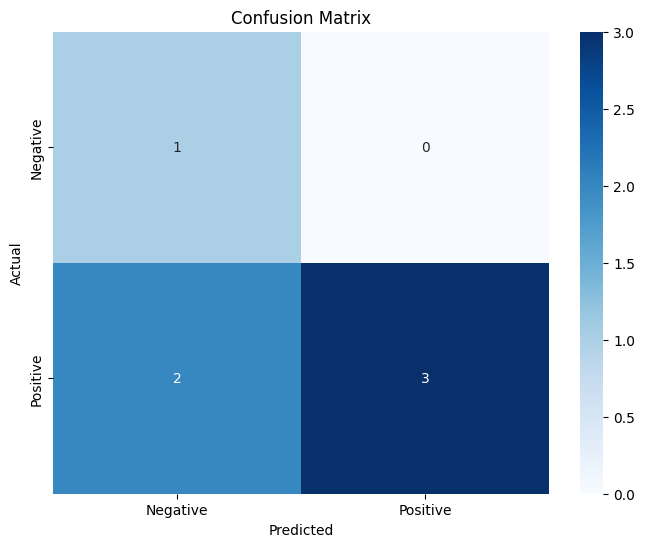

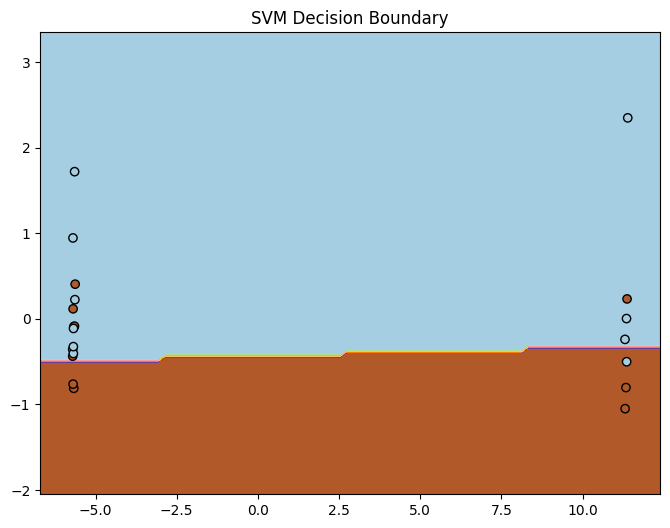

  0%|          | 0/6 [00:00<?, ?it/s]

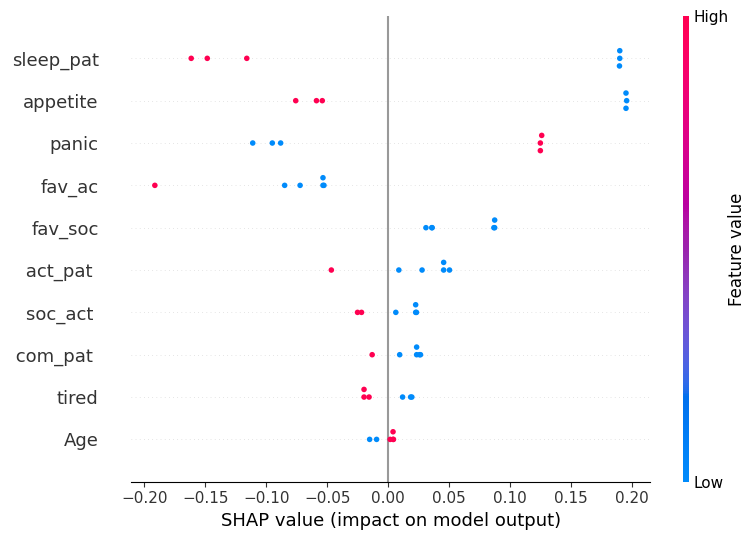

In [ ]:
# Support Vector Machine
features = ['Age', 'fav_soc', 'soc_act ', 'fav_ac', ' com_pat ', 'panic', 'sleep_pat', 'appetite', ' act_pat ', 'tired']
target = 'outcome'

df_processed = df.copy()

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
for column in features:
  if df_processed[column].dtype == object:
    df_processed[column] = le.fit_transform(df_processed[column])

# Separate features and target
X = df_processed[features]
y = df_processed[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot SVM Secision Boundary
fig, ax = plt.subplots(figsize=(8, 6))
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
svm_model_reduced = SVC(kernel='linear', C=1)
svm_model_reduced.fit(X_train_reduced, y_train)

DecisionBoundaryDisplay.from_estimator(
    svm_model_reduced,
    X_train_reduced,
    response_method="predict",
    cmap=plt.cm.Paired,
    ax=ax,
)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.title("SVM Decision Boundary")
plt.show()

# Calculate SHAP values for the test set
explainer = shap.KernelExplainer(svm_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features)

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      0.20      0.33         5

    accuracy                           0.33         6
   macro avg       0.60      0.60      0.33         6
weighted avg       0.87      0.33      0.33         6



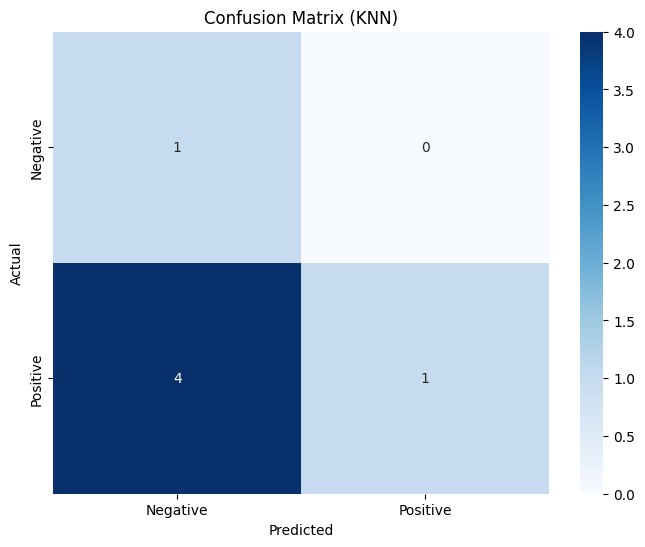

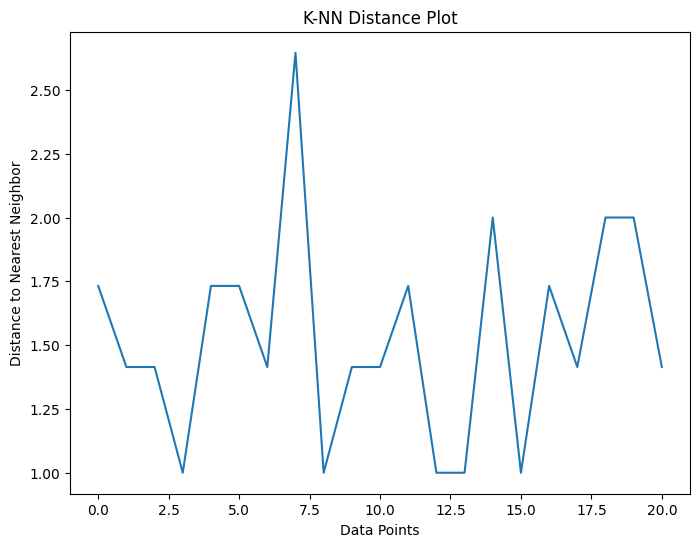

In [ ]:
# prompt: implement knn
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Plot the k-NN distance plot
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X_train)
distances, indices = neigh.kneighbors(X_train)
plt.figure(figsize=(8, 6))
plt.plot(distances[:, 1])
plt.xlabel("Data Points")
plt.ylabel("Distance to Nearest Neighbor")
plt.title("K-NN Distance Plot")
plt.show()

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



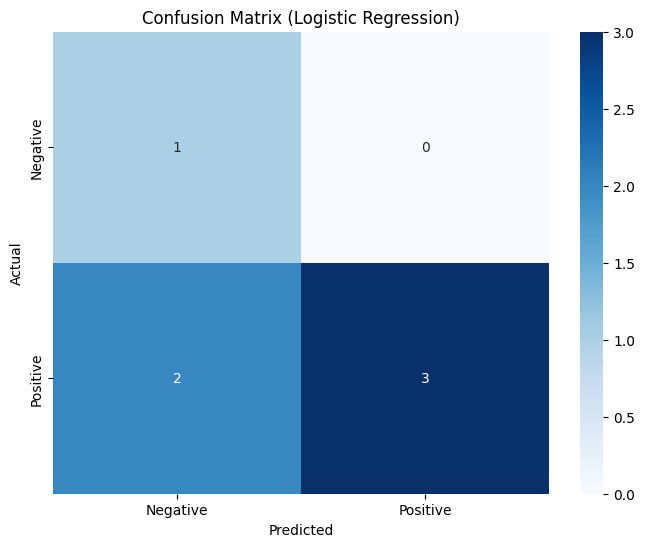

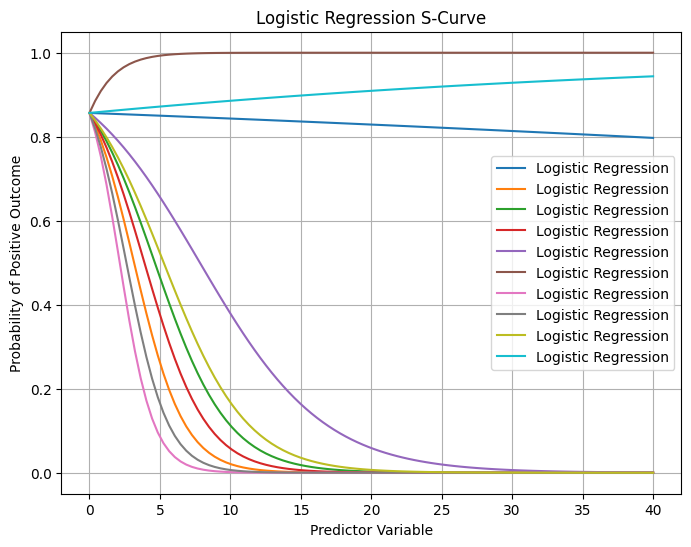

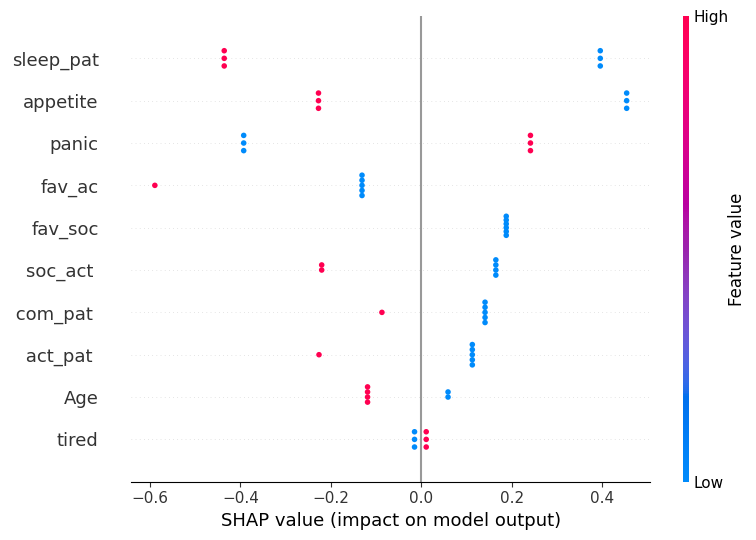

In [ ]:
# Implement logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logistic))

# Generate confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Get the coefficients and intercept of the model
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Create a range of values for the predictor variable
x_values = np.linspace(X_train.min().min(), X_train.max().max(), 100)

# Calculate the predicted probabilities using the logistic function
z = np.dot(x_values.reshape(-1, 1), coefficients.reshape(1, -1)) + intercept
y_probabilities = 1 / (1 + np.exp(-z))

# Plot the S-curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_probabilities, label='Logistic Regression')
plt.xlabel('Predictor Variable')
plt.ylabel('Probability of Positive Outcome')
plt.title('Logistic Regression S-Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate SHAP values for the test set
explainer = shap.Explainer(logistic_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



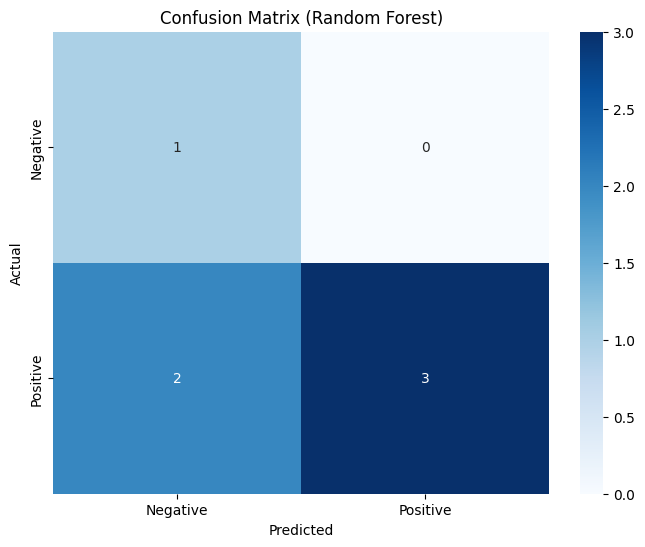

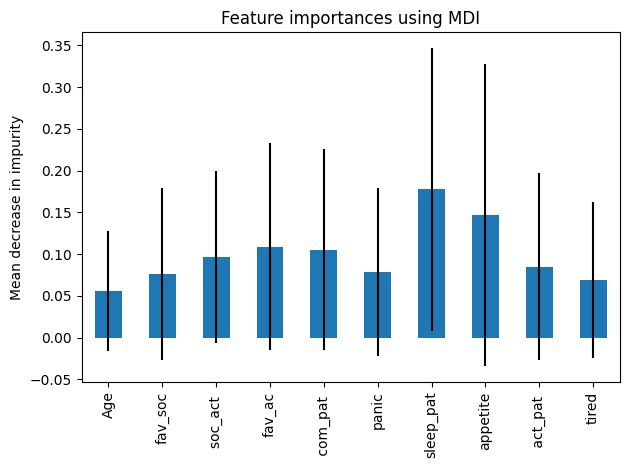

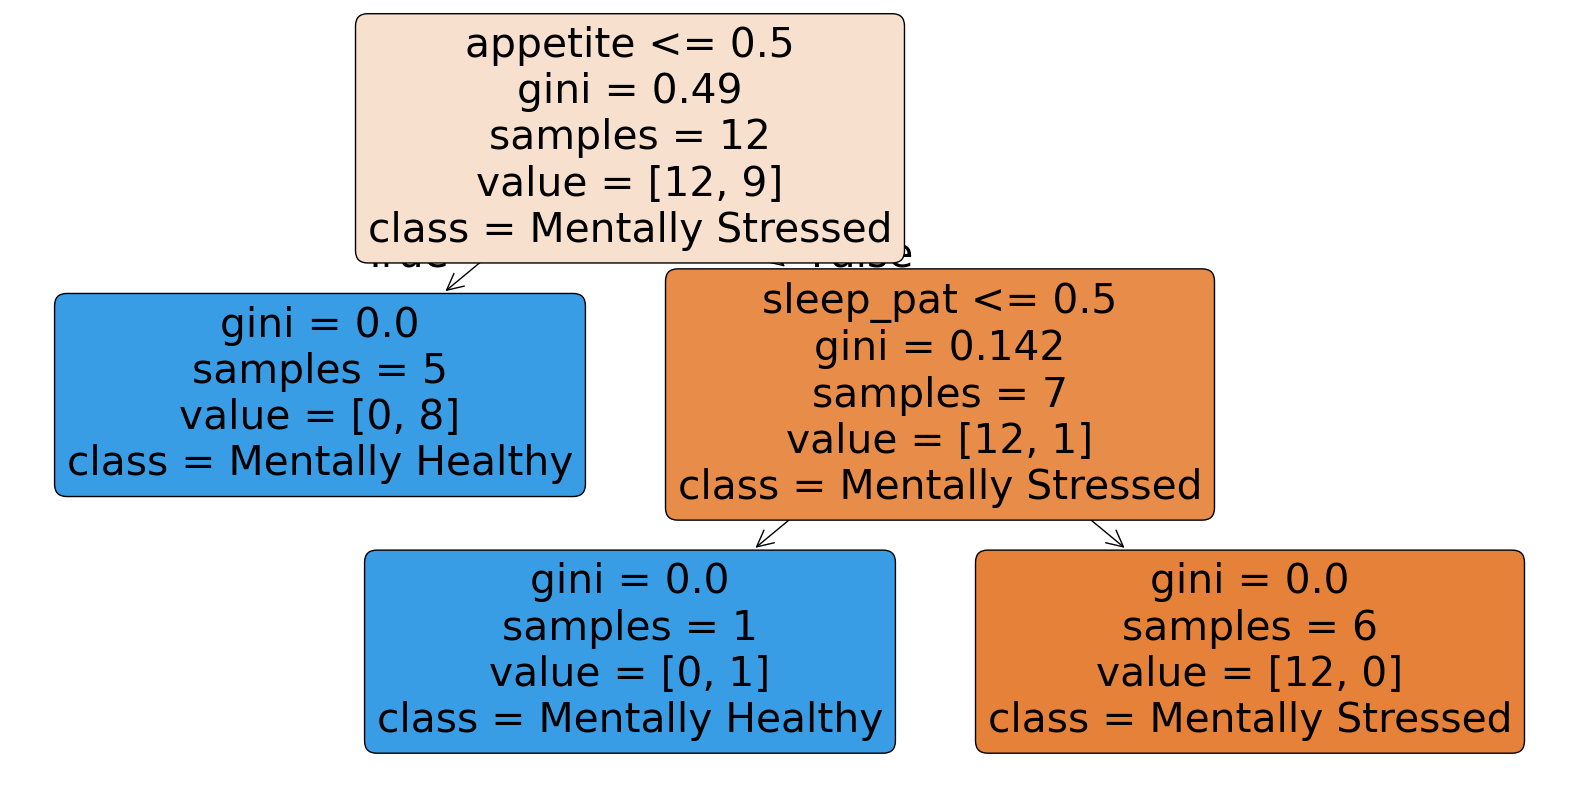

In [ ]:
# Implement Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Feature importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Plot the decision tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Mentally Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6

Accuracy: 0.6666666666666666


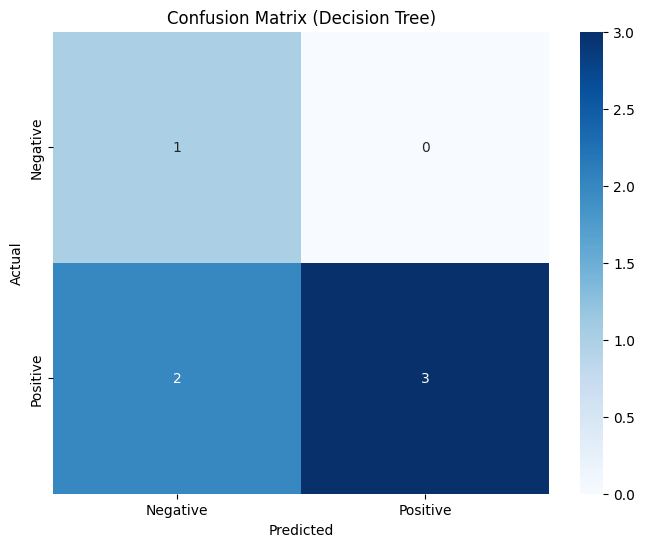

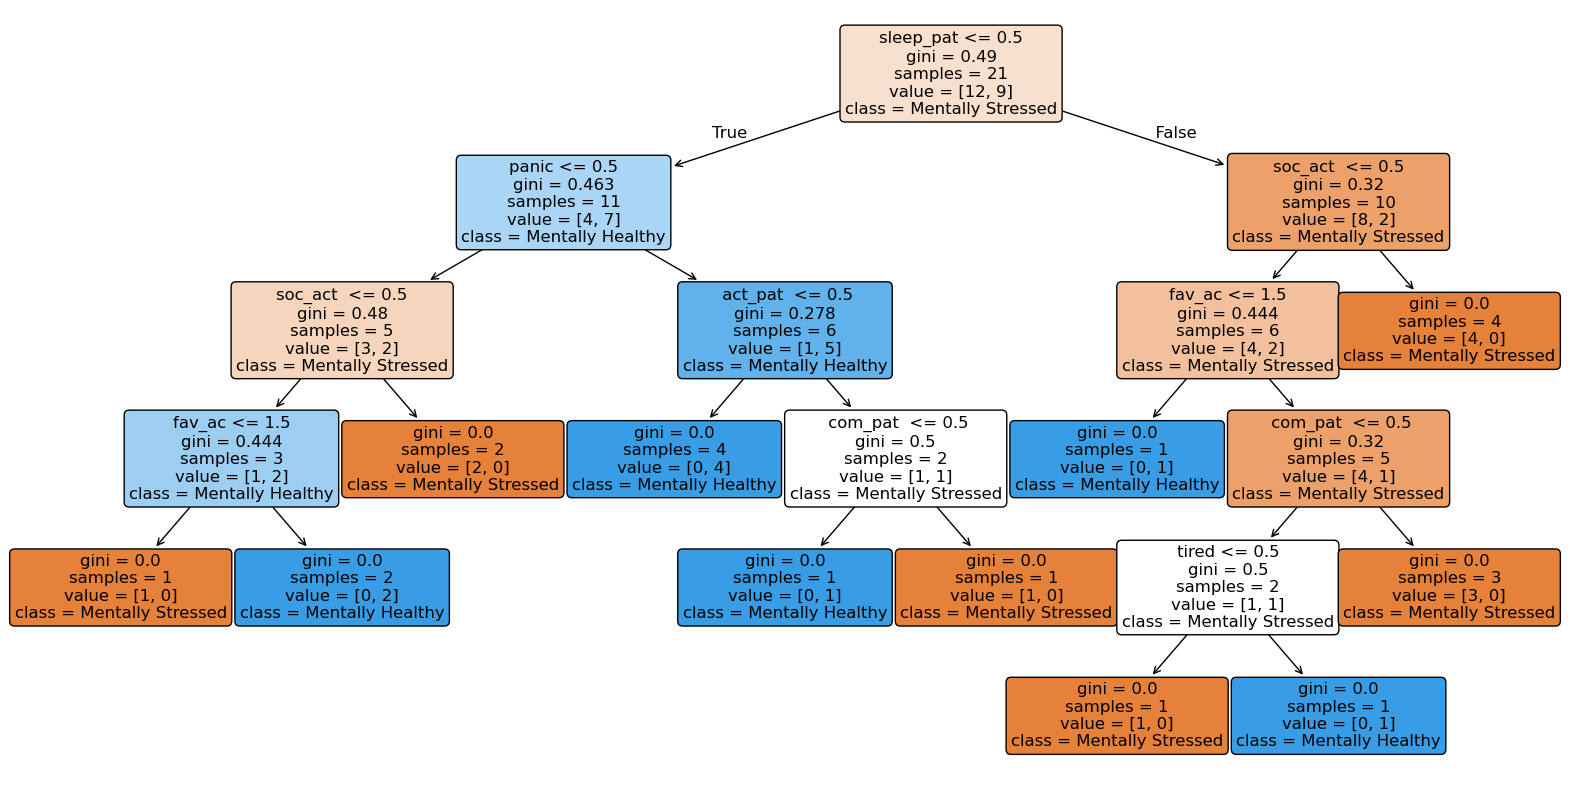

In [ ]:
# Implement Decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Mentally Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



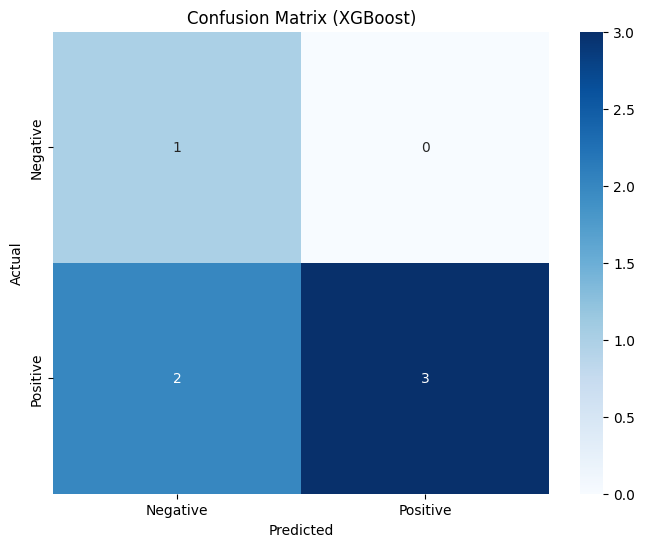

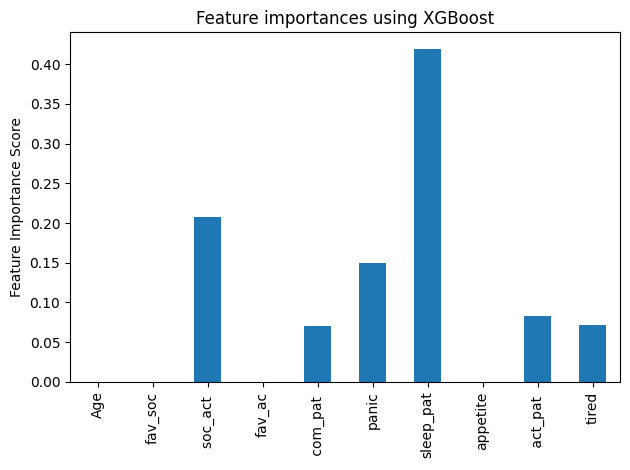

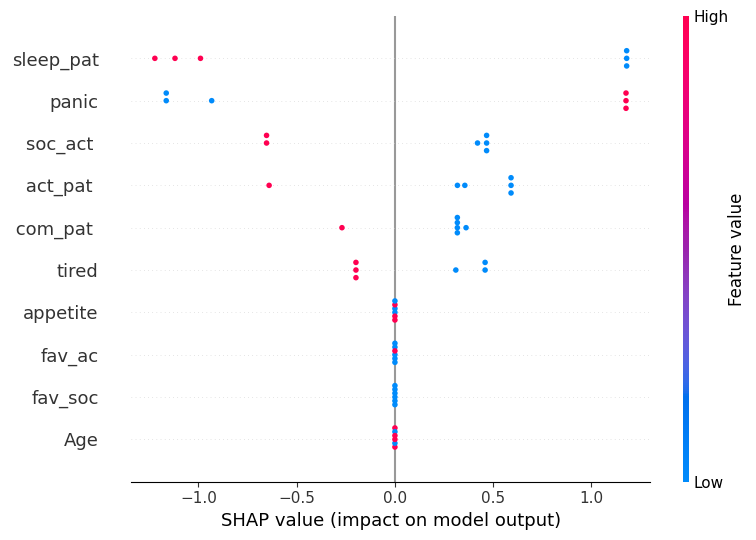

In [ ]:
# Implement XGboost

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Feature importance
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using XGBoost")
ax.set_ylabel("Feature Importance Score")
fig.tight_layout()
plt.show()

# Calculate SHAP values for the test set
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



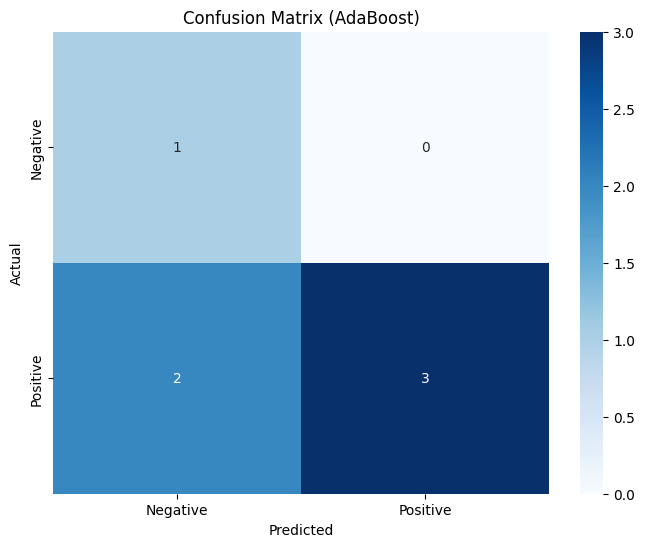

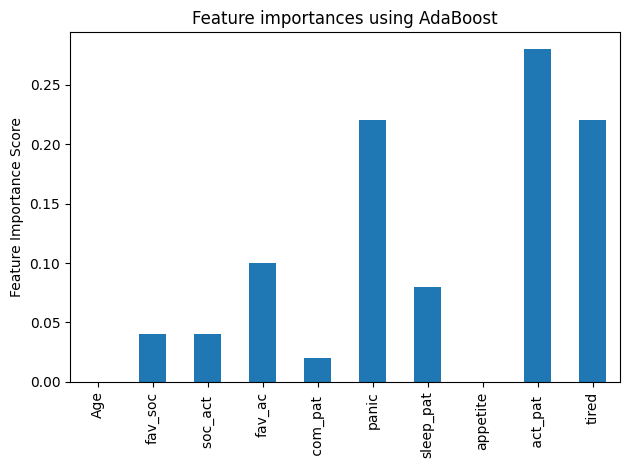

In [ ]:
# Implement Adaboost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_ada))

# Confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

# Feature importance
ada_importances = pd.Series(ada_model.feature_importances_, index=features)

fig, ax = plt.subplots()
ada_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using AdaBoost")
ax.set_ylabel("Feature Importance Score")
fig.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.9170 - val_accuracy: 0.4000 - val_loss: 1.5039
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6250 - loss: 0.8020 - val_accuracy: 0.4000 - val_loss: 1.2245
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6250 - loss: 0.7105 - val_accuracy: 0.4000 - val_loss: 0.9919
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 0.6542 - val_accuracy: 0.4000 - val_loss: 0.8278
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6250 - loss: 0.6384 - val_accuracy: 0.4000 - val_loss: 0.7373
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5625 - loss: 0.6553 - val_accuracy: 0.4000 - val_loss: 0.6991
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5625 - loss: 0.6814 - val_accuracy: 0.6000 - val_loss: 0.6894
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6250 - loss: 0.6968 - val_accuracy: 0.6000 - val_loss: 0.6898
Epoch 9/10
1

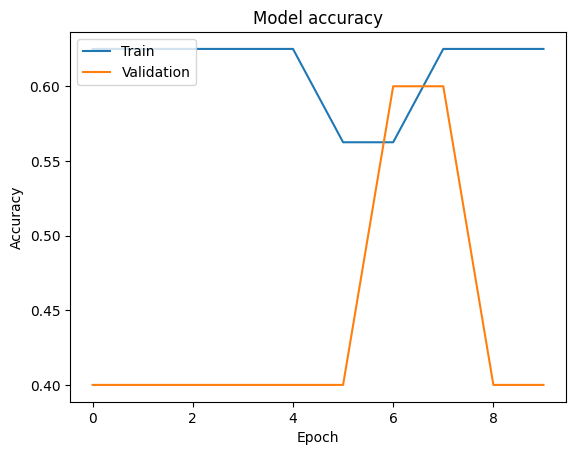

In [ ]:
# Implement sequential model from keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
